In [1]:
import pandas as pd
import numpy as np

In [31]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [32]:
data = pd.merge(transactions, customers, on='CustomerID')

In [33]:
data.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04


In [34]:
agg_data = data.groupby('CustomerID').agg(
    TotalValue=('TotalValue', 'sum'),
    Quantity=('Quantity', 'sum'),
    YearsSinceSignup=('SignupDate', lambda x: (pd.to_datetime('today') - pd.to_datetime(x).max()).days / 365),
    Region=('Region', 'first')
).reset_index()

In [35]:
agg_data.head(3)

,CustomerID,TotalValue,Quantity,YearsSinceSignup,Region
0,C0001,3354.52,12,2.553425,South America
1,C0002,1862.74,10,2.956164,Asia
2,C0003,2725.38,14,0.893151,South America


In [36]:
region_dummies = pd.get_dummies(agg_data['Region'], prefix='Region', drop_first=True)

In [37]:
agg_data = agg_data.drop(columns=['Region'])
agg_data = pd.concat([agg_data, region_dummies], axis=1)

In [27]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(agg_data.drop(columns=['CustomerID']))

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(n_clusters=5, random_state=42)
agg_data['Cluster'] = kmeans.fit_predict(scaled_data)

In [42]:
from sklearn.metrics import davies_bouldin_score

In [43]:
db_index = davies_bouldin_score(scaled_data, agg_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 1.0884359822893979


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

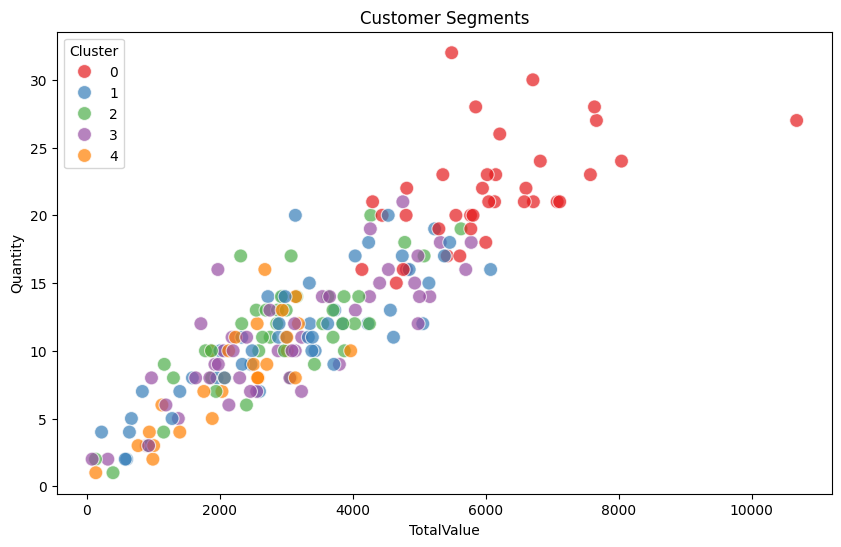

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=agg_data['TotalValue'], y=agg_data['Quantity'], hue=agg_data['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segments')
plt.xlabel('TotalValue')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

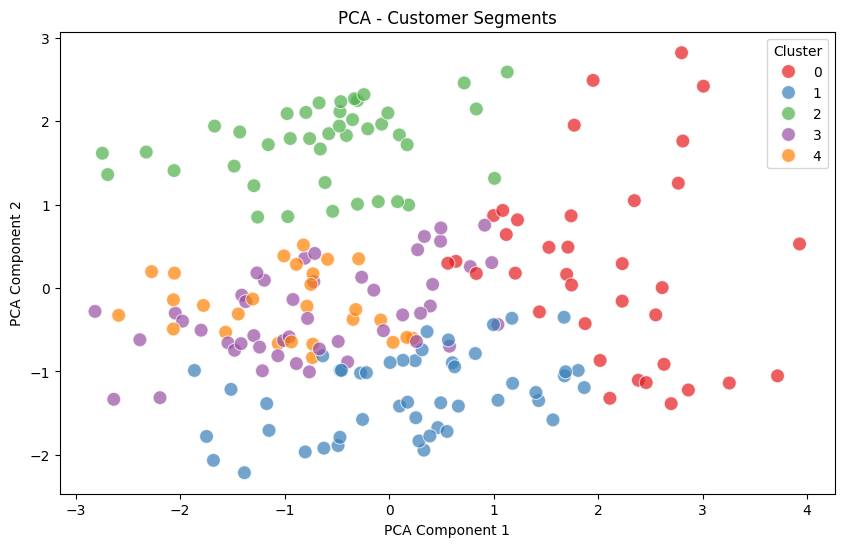

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=agg_data['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('PCA - Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [49]:
agg_data[['CustomerID', 'Cluster']].to_csv('Segmentation.csv', index=False)